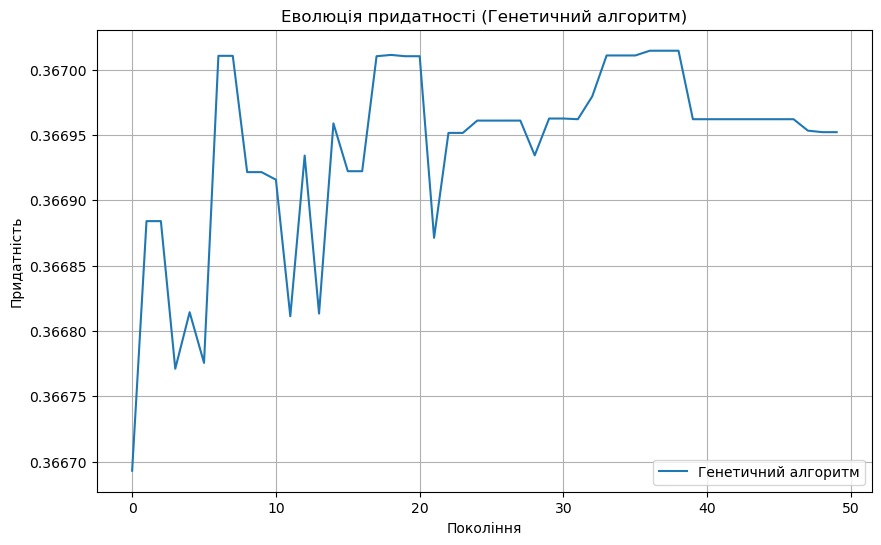

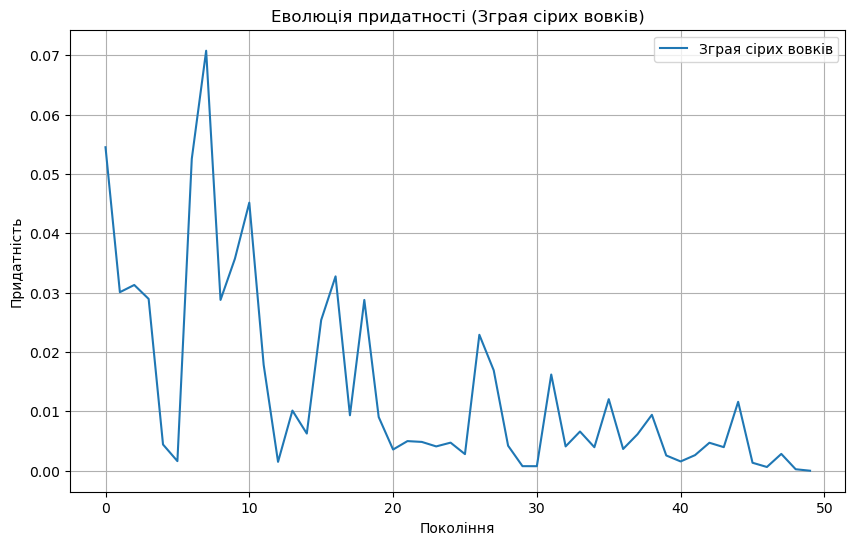

              Алгоритм  Найкраще значення  Найкраще положення
0  Генетичний алгоритм           0.365542            0.303785
1   Зграя сірих вовків           0.000003           -0.486859


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Врахування пункту 2
# У генетичному алгоритмі (GA) всі процеси (схрещування, мутацію та відбір) розглядаємо у двійковому коді. 
# Двійковий код переводимо у дійсне число через нормалізацію до діапазону [a, b].

class GeneticSolver:
    def __init__(self, bounds, genome_size, population_count, generations=100, mutation_rate=0.01, crossover_rate=0.7, seed=42):
        np.random.seed(seed)
        self.low, self.high = bounds
        self.genome_size = genome_size
        self.population_count = population_count
        self.generations = generations
        self.mutation_rate = mutation_rate
        self.crossover_rate = crossover_rate
        self.population = self.create_initial_population()

    def create_initial_population(self):
        return [''.join(np.random.choice(['0', '1'], self.genome_size)) for _ in range(self.population_count)]

    def decode_genome(self, genome):
        value = int(genome, 2)
        return self.low + (value / (2**self.genome_size - 1)) * (self.high - self.low)

    def calculate_fitness(self, x):
        return np.abs(0.2 - (-x)*(1-x)*np.cos(6*np.pi*x)*np.cos(7*np.pi*x))

    def select_parents(self):
        fitness = np.array([self.calculate_fitness(self.decode_genome(gen)) for gen in self.population])
        probabilities = fitness / fitness.sum()
        parents = np.random.choice(self.population, size=self.population_count, p=probabilities)
        return parents

    def crossover(self, parent1, parent2):
        if np.random.rand() < self.crossover_rate:
            point = np.random.randint(1, self.genome_size - 1)
            child1 = parent1[:point] + parent2[point:]
            child2 = parent2[:point] + parent1[point:]
            return child1, child2
        return parent1, parent2

    def mutate(self, genome):
        genome = list(genome)
        for i in range(len(genome)):
            if np.random.rand() < self.mutation_rate:
                genome[i] = '1' if genome[i] == '0' else '0'
        return ''.join(genome)

    def evolve(self):
        best_fitness = []
        decoded_values = []
        for generation in range(self.generations):
            parents = self.select_parents()
            next_generation = []
            for i in range(0, len(parents), 2):
                parent1, parent2 = parents[i], parents[i+1]
                child1, child2 = self.crossover(parent1, parent2)
                next_generation.append(self.mutate(child1))
                next_generation.append(self.mutate(child2))
            self.population = next_generation[:self.population_count]
            decoded = [self.decode_genome(gen) for gen in self.population]
            fitness = [self.calculate_fitness(x) for x in decoded]
            best_fitness.append(max(fitness))
            decoded_values.append(decoded)
        self.plot_evolution(best_fitness, decoded_values)

    def plot_evolution(self, fitness_history, decoded_values):
        plt.figure(figsize=(10, 6))
        plt.plot(fitness_history, label='Генетичний алгоритм')
        plt.xlabel('Покоління')
        plt.ylabel('Придатність')
        plt.title('Еволюція придатності (Генетичний алгоритм)')
        plt.legend()
        plt.grid(True)
        plt.show()

class GreyWolfOptimizer:
    def __init__(self, bounds, wolves_count, generations=100, seed=42):
        np.random.seed(seed)
        self.low, self.high = bounds
        self.wolves_count = wolves_count
        self.generations = generations
        self.positions = np.random.uniform(self.low, self.high, wolves_count)

    def fitness_function(self, x):
        return np.abs(0.2 - (-x)*(1-x)*np.cos(6*np.pi*x)*np.cos(7*np.pi*x))

    def optimize(self):
        fitness_history = []
        for gen in range(self.generations):
            fitness = [self.fitness_function(pos) for pos in self.positions]
            fitness_history.append(min(fitness))
            alpha = self.positions[np.argmin(fitness)]
            a = 2 - gen * (2 / self.generations)
            for i in range(self.wolves_count):
                A = 2 * a * np.random.rand() - a
                C = 2 * np.random.rand()
                D_alpha = np.abs(C * alpha - self.positions[i])
                self.positions[i] = alpha - A * D_alpha
        self.plot_evolution(fitness_history)
        return alpha

    def plot_evolution(self, fitness_history):
        plt.figure(figsize=(10, 6))
        plt.plot(fitness_history, label='Зграя сірих вовків')
        plt.xlabel('Покоління')
        plt.ylabel('Придатність')
        plt.title('Еволюція придатності (Зграя сірих вовків)')
        plt.legend()
        plt.grid(True)
        plt.show()

# Врахування пункту 3
# Перевіряємо обидва алгоритми (GA та GWO) на одновимірній тестовій одноекстримальній функції.

bounds = (0, 1)
solver = GeneticSolver(bounds, 18, 40, 50, 0.01, 0.7)
solver.evolve()

gwo_solver = GreyWolfOptimizer(bounds, 30, 50)
gwo_best = gwo_solver.optimize()

data = pd.DataFrame({
    'Алгоритм': ['Генетичний алгоритм', 'Зграя сірих вовків'],
    'Найкраще значення': [solver.calculate_fitness(solver.decode_genome(solver.population[0])), gwo_solver.fitness_function(gwo_best)],
    'Найкраще положення': [solver.decode_genome(solver.population[0]), gwo_best]
})
print(data)

**Висновки**:
1. При аналізі графіка еволюції придатності GA бачимо, що спостерігається поступове покращення значень придатності протягом поколінь. Значення стабілізуються після 40-ї ітерації.
2. При аналізі графіка еволюції придатності GWO бачимо, придатність значно зменшується, демонструючи ефективне зменшення похибки. Графік свідчить про зближення до глобального мінімуму на останніх ітераціях.
3. GWO показав кращу точність (значення придатності набагато ближче до мінімуму), тобто для досягнення максимальної точності потрібно використовувати алгоритм зграї вовків.
4. GA має плавнішу поведінку та менше стрибків, що може бути корисним для деяких задач, тобто якщо важливі стабільність і передбачуваність, то краще використовувати генетичний алгоритм.
5. GWO досягає мінімуму швидше, але демонструє більшу варіативність протягом процесу оптимізації.